In [5]:
# set random seed to replicated results
import random
random.seed(9001) 
# -----------ploting package-----------
import matplotlib
import matplotlib.pyplot as plt
# for plot showing log in xscale
matplotlib.rc('font', family='Arial')
%matplotlib inline

# for breast cancer
# import package
# -----------manipulate data package-----------
import pandas as pd
import numpy as np
# -----------machine learning package-----------
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.utils import resample


In [8]:
# load data csv or db
# load breast cancer dataset
cancer = load_breast_cancer()
data_ay = np.c_[cancer.data, cancer.target]

columns = np.append(cancer.feature_names, ["target"])
data = pd.DataFrame(data_ay, columns=columns)

no_cancer = data[data['target']==0].copy().reset_index(drop=True)
cancered = data[data['target']==1].copy().reset_index(drop=True)

print(len(no_cancer),len(cancered))
canceredc = cancered.copy()

212 357


In [10]:
# upsample for minority
df_minority_upsampled = resample(no_cancer,replace=True,n_samples=len(cancered),random_state=1)
data = canceredc.append(df_minority_upsampled,ignore_index=True)
print(len(data)) # should equal len(cancered)*2

# # undersample for majority
# df_majority_undersampled = resample(no_dfc,replace=True,n_samples=len(train_scsc),random_state=1)
# data = df_majority_undersampled.append(train_scsc,ignore_index=True)


714


In [14]:
SBS_list = ['mean concave points', 'mean fractal dimension', 'texture error', 'area error'\
 , 'compactness error', 'worst texture', 'worst symmetry']
# 用特徵篩選完的欄位
X = data[SBS_list].values
y = data.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [16]:
## 隨機森林分類
## class_weight 是用來調整如果資料imbalanced
##但比較重要的判斷不是準確度而應該是用 confusion matrix
# rf = RandomForestClassifier(random_state=6,class_weight={0:0.01,1:0.99})
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

print('train_score',round(rf.score(X_train,y_train),4))
print('test_score',round(rf.score(X_test,y_test),4))

train_score 1.0
test_score 0.979


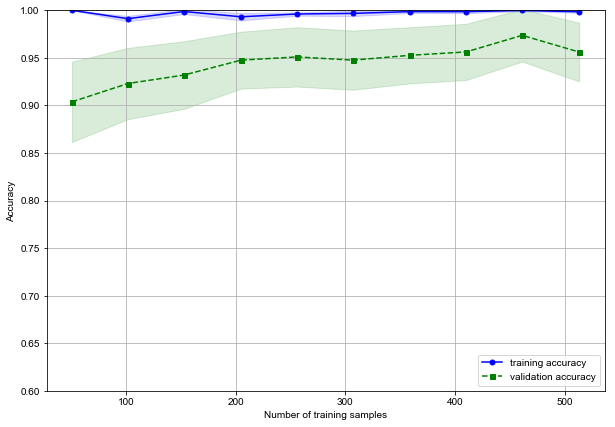

In [17]:
## 使用pipeline 串接
pipe_rf = Pipeline([('scl',StandardScaler()),('rf',RandomForestClassifier(random_state=1))])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_rf,X=X_train,\
                                                        y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores,axis=1)
plt.figure(figsize=(10,7))
plt.plot(train_sizes,train_mean,color='blue',marker = 'o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean - train_std,alpha=0.15,color='blue')

plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean-test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6,1.0])
plt.show()